In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier

In [2]:
#(1 балл) Выбрать и загрузить  датасет с помощью библиотеки Pandas. Датасет должен относиться к задаче классификации, содержать категориальные данные.
#реализовать код, вносящий случайные искажение в данные

In [3]:
df= pd.read_csv("Train.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.loc[np.random.choice(df.index, size=100, replace=False), "Customer_care_calls"] = np.nan
df.loc[np.random.choice(df.index, size=100, replace=False), "Cost_of_the_Product"] = np.nan
df.loc[np.random.choice(df.index, size=100, replace=False), "Reached.on.Time_Y.N"] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13748 entries, 0 to 13747
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   13748 non-null  int64  
 1   Warehouse_block      13748 non-null  object 
 2   Mode_of_Shipment     13748 non-null  object 
 3   Customer_care_calls  13648 non-null  float64
 4   Customer_rating      13748 non-null  int64  
 5   Cost_of_the_Product  13648 non-null  float64
 6   Prior_purchases      13748 non-null  int64  
 7   Product_importance   13748 non-null  object 
 8   Gender               13748 non-null  object 
 9   Discount_offered     13748 non-null  int64  
 10  Weight_in_gms        13748 non-null  int64  
 11  Reached.on.Time_Y.N  13648 non-null  float64
dtypes: float64(3), int64(5), object(4)
memory usage: 1.3+ MB


In [5]:
# 2.(1 балл) С помощью библиотеки Pandas произвести предварительный анализ датасета на наличие пропусков и искажений. Произвести исправление данных, используя 3 различные стратегии.

In [6]:
#Столбец Customer_care_calls может быть заполнен по медианному значению. Cost_of_the_Product - по среднему. 
#Reached.on.Time_Y.N является целевой переменной, поэтому заполняя его непонятно чем мы сильно рискуем. Наш датафрейм позволяет 
#безболезненно выкинуть 100 строк. 

In [7]:
df["Customer_care_calls"] = df["Customer_care_calls"].fillna(df["Customer_care_calls"].median())
df["Cost_of_the_Product"] = df["Cost_of_the_Product"].fillna(df["Cost_of_the_Product"].mean())
df = df.dropna(subset=['Reached.on.Time_Y.N'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13648 entries, 0 to 13747
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   13648 non-null  int64  
 1   Warehouse_block      13648 non-null  object 
 2   Mode_of_Shipment     13648 non-null  object 
 3   Customer_care_calls  13648 non-null  float64
 4   Customer_rating      13648 non-null  int64  
 5   Cost_of_the_Product  13648 non-null  float64
 6   Prior_purchases      13648 non-null  int64  
 7   Product_importance   13648 non-null  object 
 8   Gender               13648 non-null  object 
 9   Discount_offered     13648 non-null  int64  
 10  Weight_in_gms        13648 non-null  int64  
 11  Reached.on.Time_Y.N  13648 non-null  float64
dtypes: float64(3), int64(5), object(4)
memory usage: 1.4+ MB


In [9]:
# 3.(1 балл) С помощью библиотеки matplotlib построить графики исходных данных для каждой пары признаков (если набор данных позволяет это, 
#в противном случае вернуться к этому пункту после уменьшения размерности в п.6).

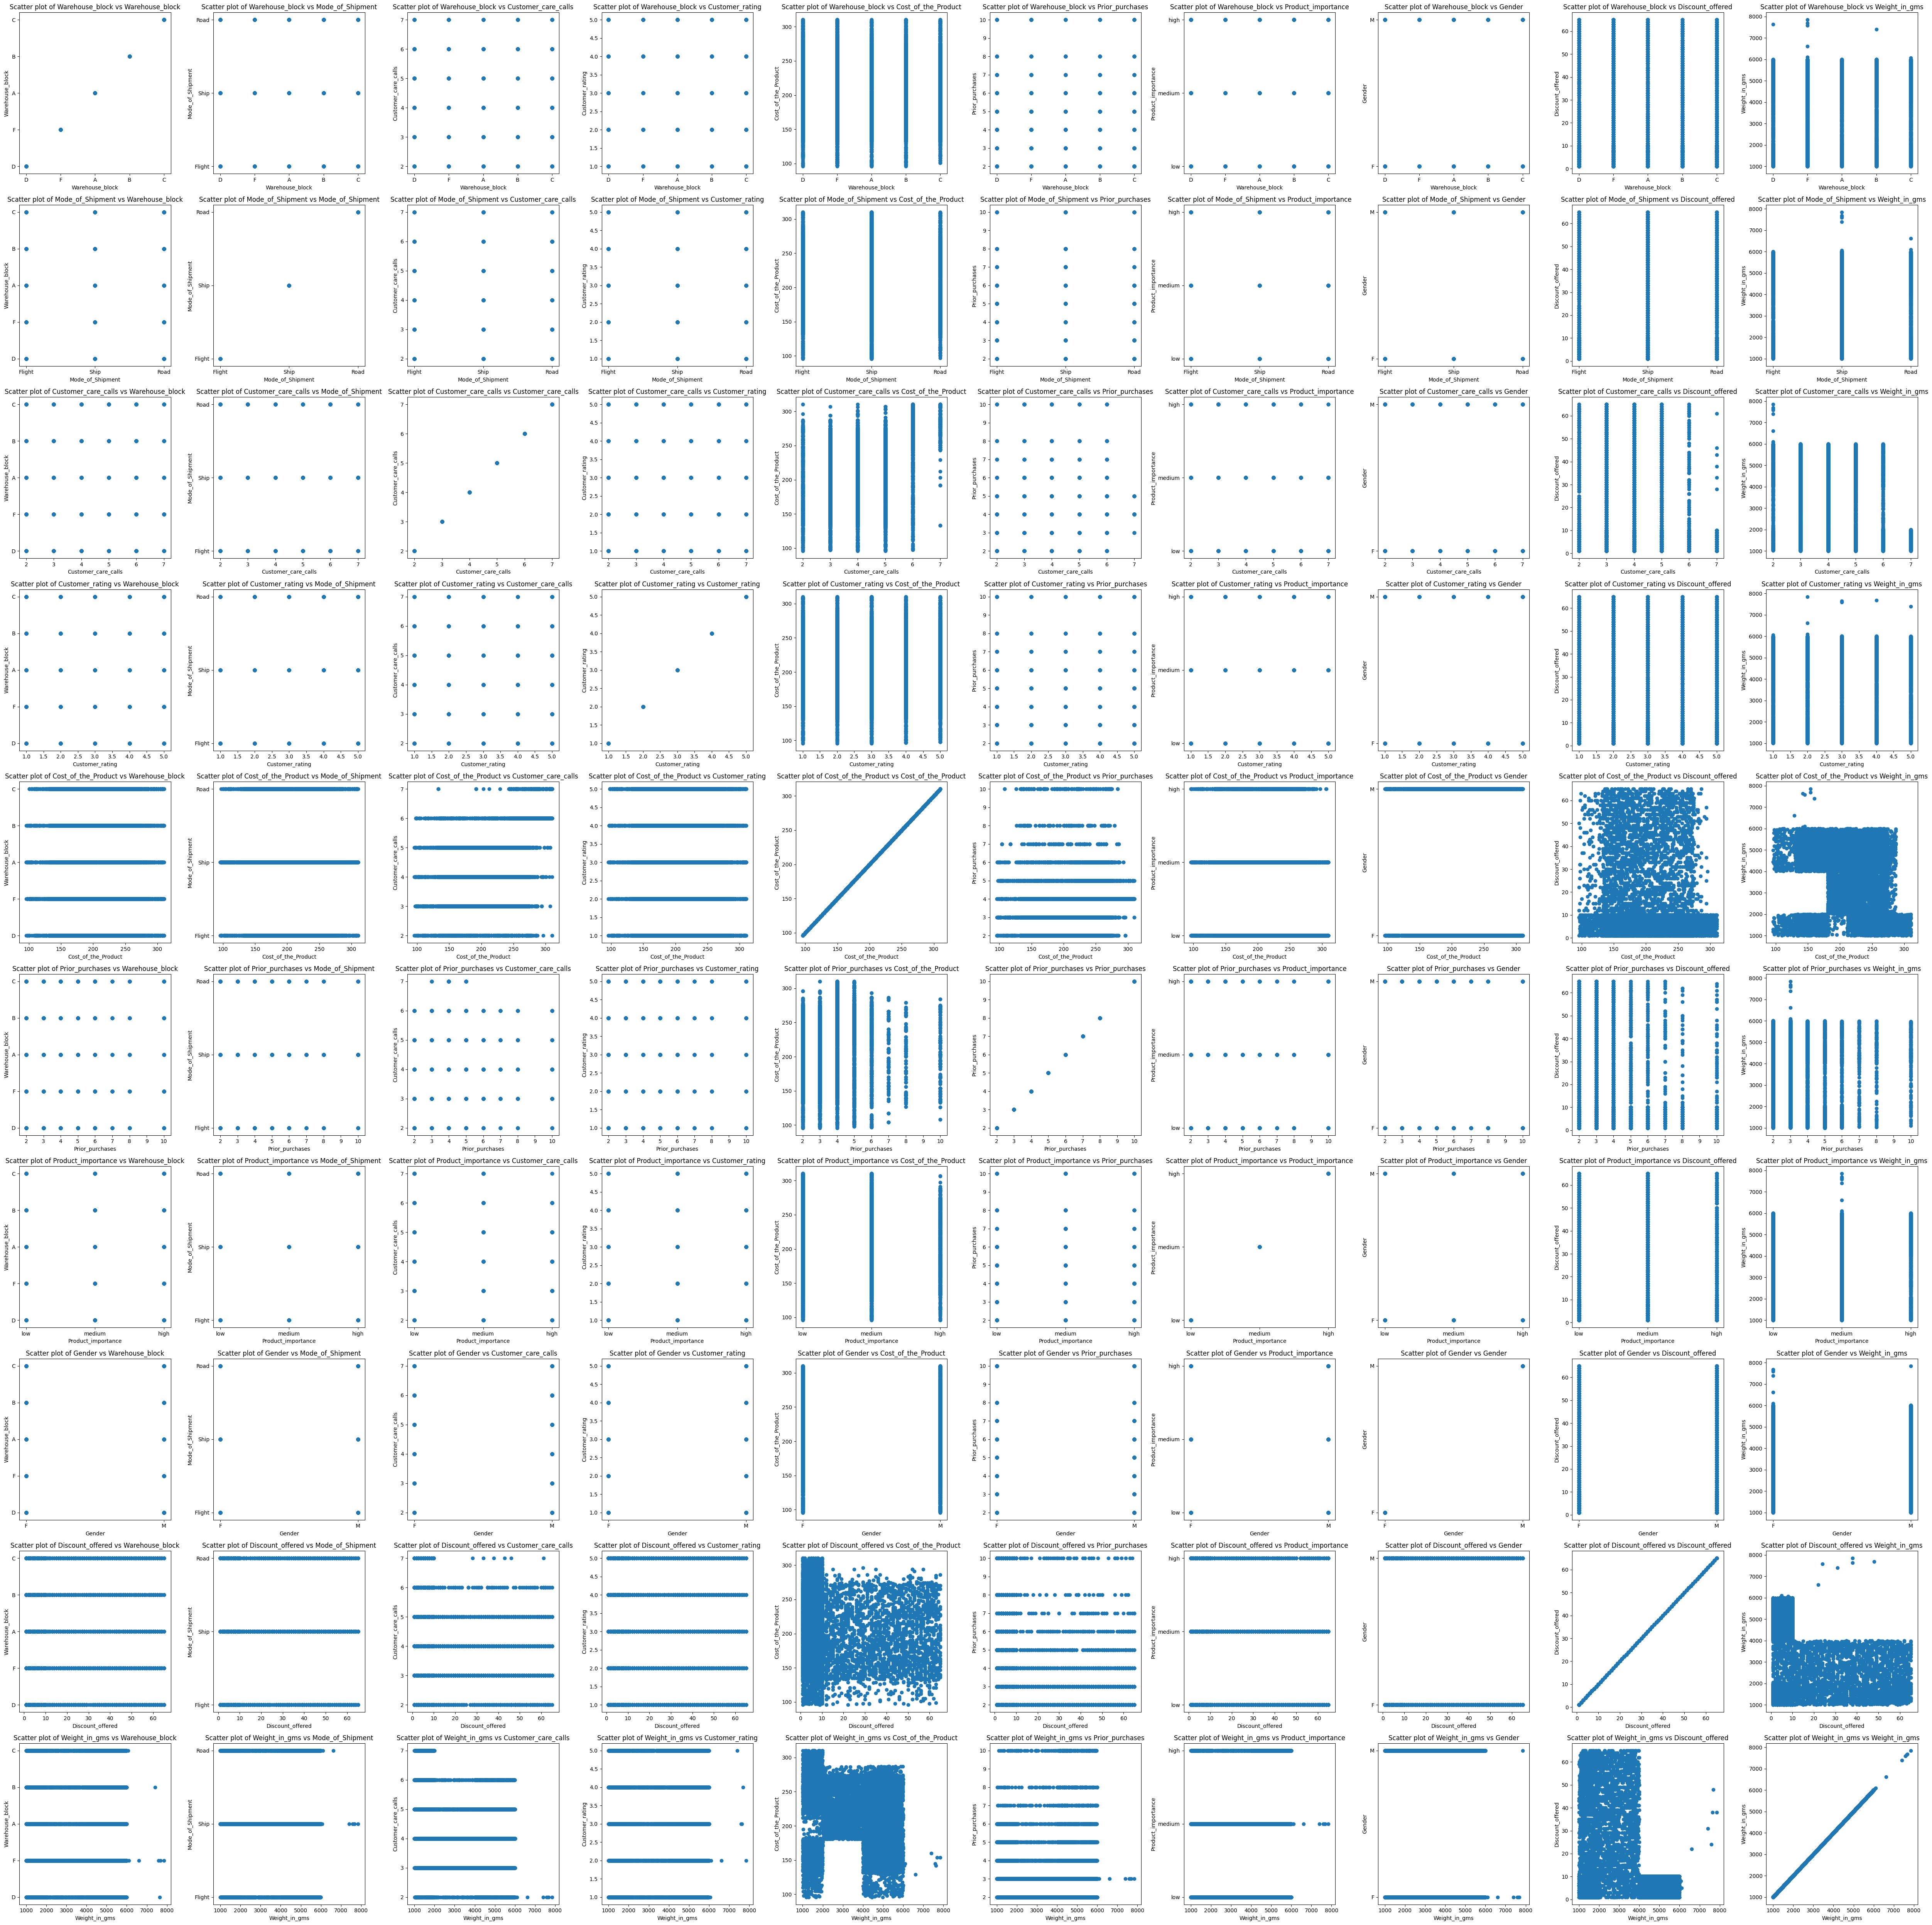

In [10]:
features = ["Warehouse_block", "Mode_of_Shipment", "Customer_care_calls", "Customer_rating", 
            "Cost_of_the_Product", "Prior_purchases", "Product_importance", "Gender", 
            "Discount_offered", "Weight_in_gms"]

ddf = df[features]

# Создание графиков
fig, ax = plt.subplots(10, 10, figsize=(50, 50))
for i in range(10):
    for j in range(10):
        if i < len(features) and j < len(features):  # Проверка, что индексы не выходят за пределы
            ax[i, j].scatter(ddf[features[i]], ddf[features[j]])
            ax[i, j].set_xlabel(features[i])
            ax[i, j].set_ylabel(features[j])
            ax[i, j].set_title(f'Scatter plot of {features[i]} vs {features[j]}')

plt.tight_layout()
plt.show()

In [47]:
#Выявлены следующие зависимости: 
#наиболее частые скидки - <15% товары с самой большой и с самой маленькой ценой скидки, как правило, не имеют (9;5)
#почему-то дешевых товаров весом от 2.5 до 4 килограмм нет в статистике (9;6)
#товары с маленькими скидками, в среднем, тяжелее (9;10)

In [48]:
# 4(1 балл) Произвести кодирование категориальных признаков. Применить one-hot-encoding. Произвести стандартизацию данных.

In [11]:
df['Warehouse_block'].unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [12]:
df['Mode_of_Shipment'].unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

In [13]:
df['Customer_care_calls'].unique()

array([4., 2., 3., 5., 6., 7.])

In [14]:
df['Cost_of_the_Product'].unique()

array([177.       , 216.       , 183.       , 176.       , 184.       ,
       162.       , 250.       , 150.       , 164.       , 189.       ,
       232.       , 198.       , 275.       , 152.       , 227.       ,
       143.       , 239.       , 145.       , 161.       , 156.       ,
       211.       , 251.       , 225.       , 172.       , 234.       ,
       266.       , 257.       , 223.       , 149.       , 137.       ,
       181.       , 215.       , 269.       , 139.       , 174.       ,
       151.       , 210.       , 169.       , 160.       , 190.       ,
       141.       , 165.       , 170.       , 246.       , 238.       ,
       193.       , 221.       , 179.       , 105.       , 261.       ,
       202.       , 109.       , 158.       , 231.       , 206.       ,
       187.       , 230.       , 212.0978898, 113.       , 180.       ,
       132.       , 217.       , 197.       , 185.       , 278.       ,
       229.       , 186.       , 286.       , 175.       , 219. 

In [15]:
df['Prior_purchases'].unique()

array([ 3,  2,  4,  6,  5,  7, 10,  8])

In [16]:
df['Product_importance'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [17]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [18]:
df['Discount_offered'].unique()

array([44, 59, 48, 10, 46, 12,  3, 11, 29, 32,  1, 43, 45,  6, 36, 18, 38,
       51,  2, 28, 24, 31, 61, 22,  4, 62, 16, 56, 15,  9, 40, 37, 41, 17,
       64, 52, 49, 39, 14, 33, 21, 13, 23, 26, 57,  7, 35,  8,  5, 53, 55,
       47, 65, 25, 50, 60, 20, 19, 63, 58, 34, 54, 27, 42, 30])

In [19]:
df['Weight_in_gms'].unique()

array([1233, 3088, 3374, ..., 1086, 1649, 1098])

In [20]:
#закодируем следующие фичи: Warehouse_block Mode_of_Shipment Product_importance Gender

In [21]:
df = pd.get_dummies(df, columns=["Warehouse_block","Mode_of_Shipment","Product_importance","Gender"], drop_first=True)

In [22]:
y = df['Reached.on.Time_Y.N'].values
x = df.drop(columns = ['ID', 'Reached.on.Time_Y.N','Weight_in_gms'])

In [23]:
cols = x.columns
x = pd.DataFrame(StandardScaler().fit(x).transform(x), columns = cols)

In [24]:
x.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,-0.081969,-0.696329,-0.735405,-0.407251,2.163742,-0.446781,-0.447017,2.235871,-0.707418,-0.436712,-1.453664,1.029751,-0.875632,-0.989939
1,-0.081969,1.421835,0.081895,-1.065568,3.171530,-0.446781,-0.447017,-0.447253,1.413592,-0.436712,-1.453664,1.029751,-0.875632,1.010163
2,-1.828602,-0.696329,-0.609667,0.251065,2.432485,-0.446781,-0.447017,-0.447253,-0.707418,-0.436712,-1.453664,1.029751,-0.875632,1.010163
3,-0.955286,0.009726,-0.756362,0.251065,-0.120578,2.238233,-0.447017,-0.447253,-0.707418,-0.436712,-1.453664,-0.971109,1.142032,1.010163
4,-1.828602,-0.696329,-0.588710,-0.407251,2.298114,-0.446781,2.237052,-0.447253,-0.707418,-0.436712,-1.453664,-0.971109,1.142032,-0.989939


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [29]:
# 5.(2 балла) Разделить данные на обучающий и проверочный наборы. 
#Решить задачу классификации, используя  библиотеку sklearn тремя способами 
#(логистическая регрессия, метод опорных векторов, случайный лес), сравнить полученные результаты (метод score) для обучающих и проверочных данных. 

In [30]:
for met in [LogisticRegression(),RandomForestClassifier(),SVC()]:
    met.fit(x_train, y_train)
    print(f'Train score of {met} = {met.score(x_train, y_train)}')
    print(f'Test score of {met} = {met.score(x_test, y_test)}')


Train score of LogisticRegression() = 0.6016998827667057
Test score of LogisticRegression() = 0.5902696365767878
Train score of RandomForestClassifier() = 0.9994138335287222
Test score of RandomForestClassifier() = 0.7338804220398594
Train score of SVC() = 0.6713559984368894
Test score of SVC() = 0.6160609613130129


In [29]:
#(2 балла) Применить три подхода к понижению размерности путем отбора признаков 
#(L1 регуляризация, последовательный отбор признаков, дерево решений). 
#Сравнить полученные результаты. Сделать выводы.

In [32]:
log = LogisticRegression(penalty = 'l1', solver='liblinear', C = 0.01)
log.fit(x_train, y_train)
cf = log.coef_

x.columns[np.where(cf >0)[1]]

Index(['Discount_offered'], dtype='object')

In [33]:
SFS = SequentialFeatureSelector(LogisticRegression(), n_features_to_select = 4, direction='forward')
SFS.fit(x_train, y_train)
p = x.columns[SFS.get_support()]
p

Index(['Cost_of_the_Product', 'Discount_offered', 'Warehouse_block_C',
       'Mode_of_Shipment_Ship'],
      dtype='object')

In [34]:
Tree = DecisionTreeClassifier()
Tree.fit(x_train, y_train)
i = Tree.feature_importances_
p = pd.DataFrame({'Feature': x.columns,'Importance': i}).sort_values(by='Importance', ascending=False)[:5]
p

,Feature,Importance
4,Discount_offered,0.322745
2,Cost_of_the_Product,0.243320
1,Customer_rating,0.098636
0,Customer_care_calls,0.074537
3,Prior_purchases,0.049779


In [35]:
#Получается больше всего на доставку влияют денежные показатели: скидка и стоимость продукта. Менее значительное, но все же существенное
#влияние оказывают такие факторы, как рейтинг покупателя и звонки.